weather sunny =0, overcast=1, rainy=2
temp hot=0, mid=1 cold=2
result yes=1 no=0

In [1]:
weather_translate = ["sunny", "overcast", "rainy"]
temp_translate = ["hot", "mild", "cool"]
result_translate = ["no", "yes"]

In [2]:
weather = ["sunny", "sunny","overcast", "rainy", "rainy", "rainy", "overcast","sunny","sunny","rainy", "sunny", "overcast", "overcast", "rainy" ]
temp =["hot", "hot", "hot", "mild", "cool", "cool","cool", "mild", "cool","mild","mild","mild" , "hot", "mild"]
result = ["no","no", "yes", "yes", "yes", "no", "yes","no", "yes","yes","yes","yes","yes","no" ]

In [3]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
le = preprocessing.LabelEncoder()
weather_num = le.fit_transform(weather)
print(weather_num)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [5]:
temp_num = le.fit_transform(temp)
result_num = le.fit_transform(result)
print(temp_num, result_num)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2] [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
features = list(zip(weather_num, temp_num))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
model.fit(features,result_num)

KNeighborsClassifier(n_neighbors=3)

In [10]:
predic = model.predict([[0,2]])
print(predic)

[1]


# KNN With Multiple Labels

In [11]:
from sklearn import datasets

In [12]:
wine =datasets.load_wine() 

In [13]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [14]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [15]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [16]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [17]:
print(wine.data.shape)

(178, 13)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.5740740740740741


In [23]:
#acuracy 70%

In [24]:
#K = 7

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [26]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.5740740740740741


In [27]:
#akurasi = 72%

In [28]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Mean')

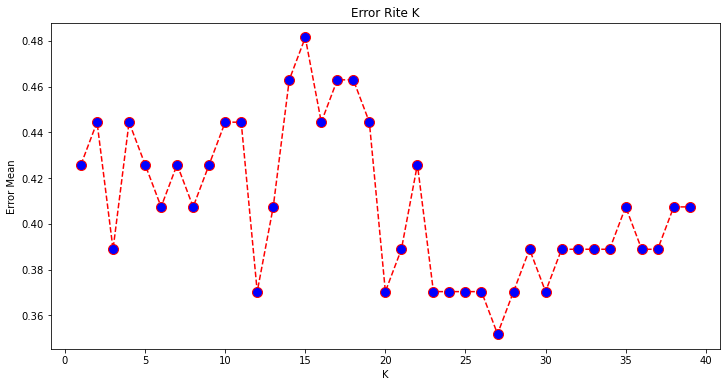

In [29]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title('Error Rite K')
plt.xlabel("K")
plt.ylabel("Error Mean")

In [31]:
knn = KNeighborsClassifier(n_neighbors=25)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.6296296296296297


In [36]:
pip install pandas_profiling


  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [38]:
filename = "KNN.pkl"
pickle.dump(knn,open('KNN.pkl','wb'))

In [39]:
load_model = pickle.load(open('KNN.pkl','rb'))
